# <center>机器视觉精品课程-神经网络部分 </center>

### 授课内容
- **神经网络基础：基础概念：损失函数、神经元结构、多层感知机，手写数字识别**

<img src="images/图像识别/幻灯片3.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片4.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片5.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片6.JPG" alt="幻灯片" style="zoom:120%;" />

# 举例-线性回归

- **回归**（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。

- 在机器学习领域中的大多数任务通常都与**预测**（prediction）有关。

- 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、预测需求（零售销量等）。

## 线性回归的基本元素

为了解释**线性回归**，我们举一个实际的例子：
我们希望根据房屋的$\color{red} {面积} $（平方英尺）和$\color{red} {房龄} $（年）来估算$\color{red} {房屋价格} $（美元）。
为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。
这个数据集包括了房屋的销售价格、面积和房龄。

在机器学习的术语中
- 数据集会被分为为*训练数据集*（training data set）或*训练集*（training set）。
- 每行数据（比如一次房屋交易相对应的数据）称为*样本*（sample），也可以称为*数据点*（data point）或*数据样本*（data instance）。
- 把试图预测的目标（比如预测房屋价格）称为*标签*（label）或*目标*（target）。
- 预测所依据的自变量（面积和房龄）称为*特征*（feature）或*协变量*（covariate）。

通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

# <center>模型 = 框架 + 参数</center>
### 线性模型


线性假设目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

其中：
- $area$和$age$ 称为*特征*（feature）。
- $w_{\mathrm{area}}$和$w_{\mathrm{age}}$ 称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
- $b$称为*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）。偏置是指当所有特征都取值为0时，预测值应该为多少。



目标：
- 使用给定数据集，寻找模型的权重$\mathbf{w}$和偏置$b$
- 使得根据模型做出的预测大体符合数据里的真实价格。


### 损失函数

#### 均方误差 MSE（mean squared error）

在我们开始考虑如何用模型*拟合*（fit）数据之前，我们需要确定一个拟合程度的**度量**。
- *损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
- 通常我们会选择**非负数**作为损失，且数值越小表示损失越小，完美预测时的损失为0。
- 回归问题中最常用的损失函数是平方误差函数。
- 当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

<!-- <div align=center>
    <img src="../../../d2l-zh/pytorch/img/fit-linreg.svg" alt="用线性模型拟合数据" style="zoom:120%;" />
</div> -->

- 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

- 在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

In [1]:
import torch
y = torch.tensor([1,2,3],dtype = torch.float)
y_hat = torch.tensor([5,10,4],dtype = torch.float)
loss = torch.nn.MSELoss(reduction='mean')
print('MSELoss = ',loss(y_hat,y).item())

MSELoss = 0
for i in range(y.shape[0]):
    MSELoss += (y[i] - y_hat[i])**2 /2
MSELoss /= y.shape[0]
print('MSELoss = ',loss(y_hat,y).item())

MSELoss =  27.0
MSELoss =  27.0


### 梯度下降

- 用到一种名为*梯度下降*（gradient descent）的方法，这种方法几乎可以优化所有深度学习模型。
- 它通过不断地在损失函数递减的方向上更新参数来降低误差。
- 梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）。

- 我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \mathcal{lr}\sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).
\\
y = f(w) \approx f(w_0) + f'(w_0)\Delta w \rightarrow \Delta y = f'(w_0)\Delta w \\
if \ \  \Delta w = - lr*f'(w_0) (lr > 0 ), \Delta y = -lr*f'^2(w_0) < 0
$$


总结一下，算法的步骤如下：

（1）初始化模型参数的值，如随机初始化；

（2）利用数据集在负梯度的方向上更新参数，并不断迭代这一步骤。

- 学习率 lr

In [2]:
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-2, 2, steps =100,requires_grad=True) 
y = x**2
y.backward(torch.ones_like(x))

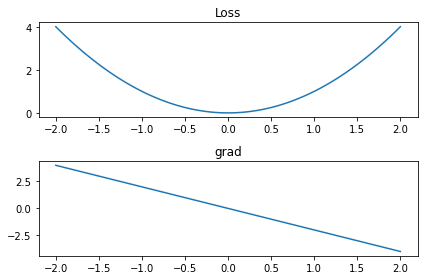

In [3]:
z = x.grad
# 激活第一个 subplot
plt.subplot(2,  1,  1)  
# 绘制第一个图像 
plt.plot(x.detach().numpy(), y.detach().numpy()) 
plt.title('Loss')  
# 将第二个 subplot 激活，并绘制第二个图像
plt.subplot(2,  1,  2) 
plt.plot(x.detach().numpy(),-z)
plt.title('grad')  
# 展示图像
plt.tight_layout() 
plt.show()

# <center>模型 = 框架 + 参数</center>
## 所以保存模型就是保存模型的框架与所有涉及到参数的值


### 用模型进行预测

- 给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，我们就可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。
- 给定特征估计目标的过程通常称为*预测*（prediction）或*推断*（inference）。

<img src="images/图像识别/幻灯片7.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片8.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片9.JPG" alt="幻灯片" style="zoom:120%;" />

<img src="images/图像识别/幻灯片10.JPG" alt="幻灯片" style="zoom:120%;" />

Text(0.5, 1.0, 'Sigmod')

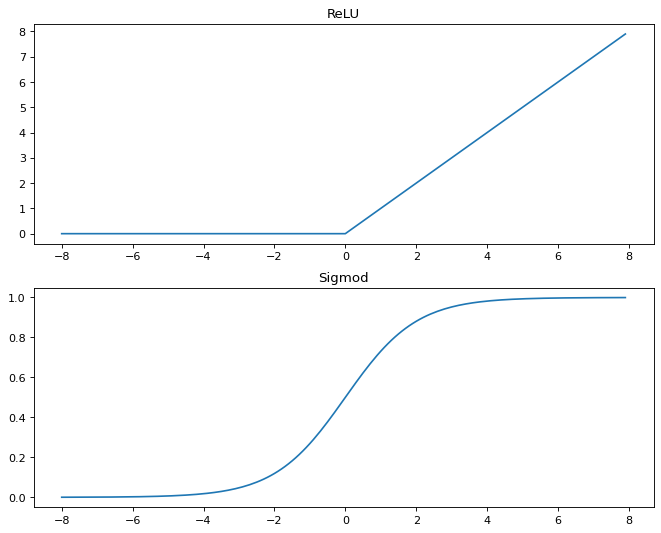

In [4]:
fig = plt.figure(figsize=(10,8), dpi= 80)
plt.subplot(2,  1,  1)  
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())
plt.title('ReLU')

plt.subplot(2,  1, 2)  
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.title('Sigmod')

<img src="images/图像识别/幻灯片11.JPG" alt="幻灯片" style="zoom:80%;" />

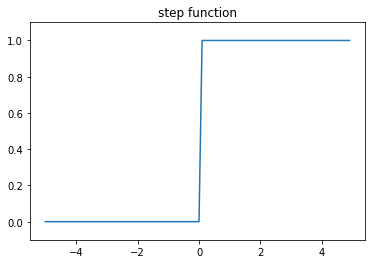

In [5]:
import matplotlib.pyplot as plt
def step_func(x): # 参数x可以接受numpy数组
    y = x >= 0 # y是布尔型数组
    return y.type(torch.int)

x = torch.arange(-5., 5., .1)
y = step_func(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y轴范围
plt.title('step function')
plt.show()

In [6]:
import numpy as np
import torch

# 定义单个神经元 2输入
net = torch.nn.Sequential(torch.nn.Linear(2,1))#torch.nn.Hardtanh(min_val=0,max_val=3,inplace=True)) #

# 定义权重
w = torch.tensor([1,1]).type(torch.float32)
b = -2

net[0].weight.data = w.reshape(net[0].weight.shape)
net[0].bias.data.fill_(b)

# 验证输出
x = torch.tensor([1.0, 1.0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())
x = torch.tensor([0, 1.0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())
x = torch.tensor([0, 0]).type(torch.float32)
print('The result of 1 and 1 is', step_func(net.forward(x)).item())

torch.matmul(x, w) + b


The result of 1 and 1 is 1
The result of 1 and 1 is 0
The result of 1 and 1 is 0


tensor(-2.)

<img src="images/图像识别/幻灯片12.JPG" alt="幻灯片" style="zoom:120%;" />

$$
y = w^T  X + b
$$

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt # 绘图与图像显示
import torch.utils.data as Data # 数据操作
from torchvision.datasets import MNIST,FashionMNIST # 数据集
from torchvision import transforms # 图像变换、数据预处理

### 加载数据集
- torchvision 中的 transforms 模块可以针对每张图像进行预处理操作

In [8]:
#Compose是一个容器，传入的参数是列表，ToTensor()，类型变换，Normalize是数据标准化，去均值，除标准差
# transforms.ToTensor() 把取值[0, 255]的PIL图像形状为[H,W,C]转换为形状[C,H,W] 取值范围[0,1.0]的张量
transform = transforms.Compose([transforms.ToTensor()])

In [9]:
data_train = MNIST(root = "data/", ## 数据的路径，如果存在数据则加载，否则下载至此路径
                            transform = transform, ## 图像变换操作
                            train =True, ## 决定使用训练集还是测试集
                            download = True) ## 选择是否需要下载数据
data_test = MNIST(root = "data/",
                            transform = transform,
                            train =False)

### 显示图像

In [10]:
for x,y in data_train:
    break

In [11]:
data_train[2][0].shape, len(data_train), len(data_test)

(torch.Size([1, 28, 28]), 60000, 10000)

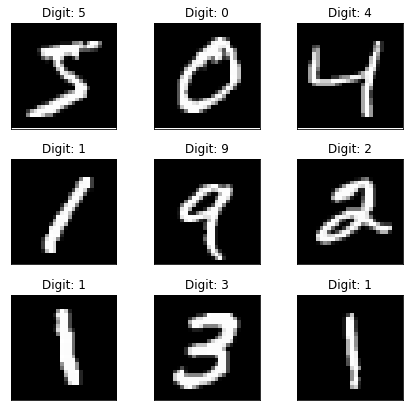

In [12]:
# plt.imshow(x[0].numpy().reshape(28,28))
# plt.show()
fig = plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(data_train[i][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(data_train[i][1]))
  plt.xticks([])
  plt.yticks([])

### 显示图像像素分布

Text(0.5, 1.0, 'Pixel Value Distribution')

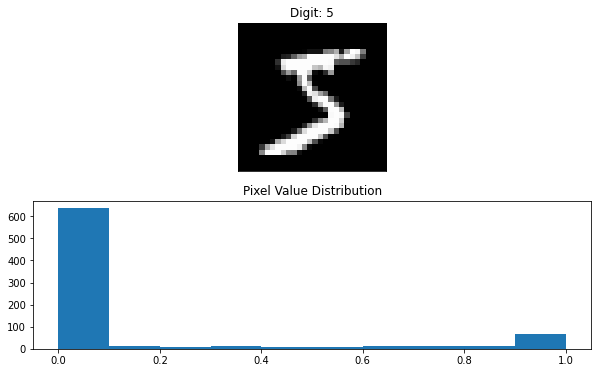

In [13]:
fig = plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.imshow(data_train[0][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
plt.title("Digit: {}".format(data_train[0][1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(data_train[0][0].numpy().reshape(784))
plt.title("Pixel Value Distribution")

### 定义模型

In [14]:
## 定义数据加载器
batch_size = 256

train_loader = Data.DataLoader(dataset = data_train, ## 使用的数据集
                                            batch_size = batch_size, ## 批处理样本大小
                                            shuffle = True ## 是否打乱数据顺序
                                            )

test_loader = Data.DataLoader(dataset = data_test,
                                            batch_size = batch_size,
                                            shuffle = True  #将顺序随机打乱
                                            )

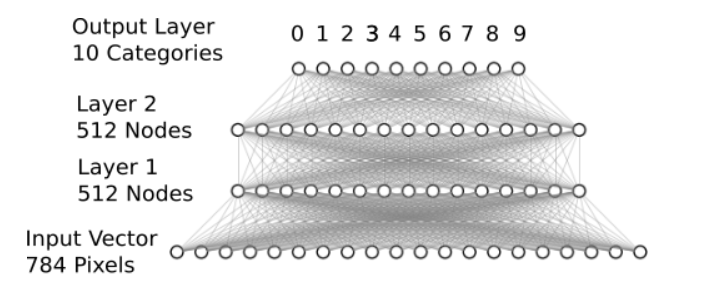

In [15]:
## 定义网络模型
net = nn.Sequential(nn.Flatten(), ## 将二维图像展平位一维数组，输入层
                    nn.Linear(in_features = 784, ## 隐藏层的输入，数据的特征数
                              out_features = 512, ## 隐藏层的输出，对应神经元的数量
                             bias = True
                             ),  ## 
                    nn.ReLU(), ## 激活函数
                    nn.Dropout(p=0.2),
                    nn.Linear(512,512), nn.ReLU(),nn.Dropout(p=0.2),nn.Linear(512,10)) # 深度网络模型

# net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10)) # MLP模型

# net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) # softmax回归模型

In [16]:
## 初始化模型参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### 训练模型

In [17]:
len(train_loader),60000/256

(235, 234.375)

In [18]:
for X, y in train_loader:
    break
output = net.forward(X)
X.shape,output.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256, 10]))

In [19]:
lr, num_epochs = 0.1, 20 ## 定义学习率及训练次数
optimizer = torch.optim.SGD(net.parameters(), lr = lr) ## 定义优化器
loss_func = nn.CrossEntropyLoss(reduction='mean') ## 定义损失函数，分类问题一般使用交叉熵损失

train_loss_all = []
train_acc_all = []
test_acc_all = []
test_loss_all = []

for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch+1,num_epochs))
    print("-"*10)
    
    running_loss = 0.0
    running_correct = 0.0
    
    for X, y in train_loader:
        net.train() ## 表明模型在训练
        output = net.forward(X) ## 模型在 X 上的输出: N * num_class
        train_loss = loss_func(output, y ) ## 交叉熵误差
        _, pred = torch.max(output.data, 1) ## 获得预测结果
        optimizer.zero_grad() ## 每次迭代将梯度初始化为0
        train_loss.backward() ## 损失的后向传播， 计算梯度
        optimizer.step() ## 使用梯度进行优化
        running_loss += train_loss.item() ## 统计模型预测损失
        running_correct += torch.sum(pred == y.data) ## 统计模型预测准确个数
        
    test_correct = 0
    val_loss = 0
    for data in test_loader:
        X_test, y_test = data        
        output = net(X_test)
        test_loss = loss_func(output, y_test )
        _, pred = torch.max(output.data, 1)
        test_correct += torch.sum(pred == y_test.data)
        val_loss += test_loss.item()
    print("Loss is:{:.4f}, Train_accuracy is {:.4f}%, Test_accuracy is {:.4f}%"
          .format(running_loss/len(train_loader),100*running_correct/len(data_train), 100*test_correct/len(data_test)))
    train_loss_all.append(running_loss/len(train_loader))
    train_acc_all.append(running_correct/len(data_train))
    test_loss_all.append(val_loss/len(test_loader))
    test_acc_all.append(test_correct/len(data_test))

Epoch 1/20
----------
Loss is:1.8631, Train_accuracy is 38.5900%, Test_accuracy is 76.2600%
Epoch 2/20
----------
Loss is:0.5476, Train_accuracy is 83.5817%, Test_accuracy is 87.3700%
Epoch 3/20
----------
Loss is:0.3801, Train_accuracy is 89.0133%, Test_accuracy is 90.0000%
Epoch 4/20
----------
Loss is:0.3154, Train_accuracy is 90.9083%, Test_accuracy is 91.5700%
Epoch 5/20
----------
Loss is:0.2659, Train_accuracy is 92.3467%, Test_accuracy is 93.0600%
Epoch 6/20
----------
Loss is:0.2286, Train_accuracy is 93.4000%, Test_accuracy is 92.9500%
Epoch 7/20
----------
Loss is:0.1971, Train_accuracy is 94.2567%, Test_accuracy is 94.6300%
Epoch 8/20
----------
Loss is:0.1742, Train_accuracy is 94.9683%, Test_accuracy is 95.2300%
Epoch 9/20
----------
Loss is:0.1552, Train_accuracy is 95.4767%, Test_accuracy is 95.5200%
Epoch 10/20
----------
Loss is:0.1416, Train_accuracy is 95.8583%, Test_accuracy is 95.7300%
Epoch 11/20
----------
Loss is:0.1290, Train_accuracy is 96.2133%, Test_accurac

### 训练效果可视化

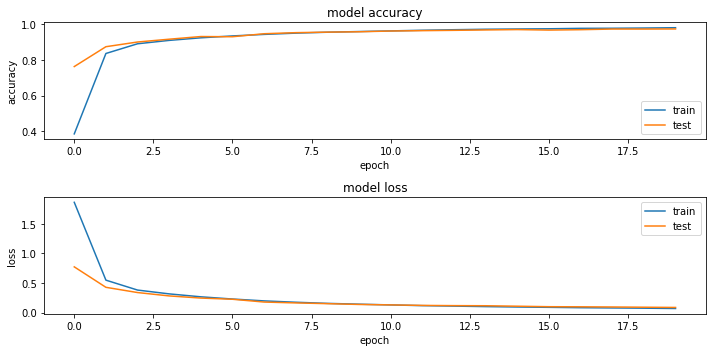

In [20]:
# plotting the metrics
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(train_acc_all)
plt.plot(test_acc_all)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_loss_all)
plt.plot(test_loss_all)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train'], loc='upper right')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# fig

### 保存模型

In [21]:
torch.save(net, "result/class_5/mlp.pkl")

### 加载并验证模型

In [22]:
net_load = torch.load("result/class_5/mlp.pkl")
net_load.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=512, out_features=10, bias=True)
)

In [23]:
for X,y in test_loader:
    break
y_hat = net_load(X)

In [24]:
y_hat[0].reshape(-1,10).shape

torch.Size([1, 10])

In [25]:
y_hat.shape,y_hat[4],torch.softmax(y_hat[4].reshape(-1,10),dim=1)

(torch.Size([256, 10]),
 tensor([-0.6811, -5.0644, -8.4763,  3.2538, -2.8183, 16.7534, -1.6986, -7.9701,
          2.8291,  4.3758], grad_fn=<SelectBackward0>),
 tensor([[2.6811e-08, 3.3470e-10, 1.1037e-11, 1.3715e-06, 3.1631e-09, 9.9999e-01,
          9.6917e-09, 1.8311e-11, 8.9694e-07, 4.2121e-06]],
        grad_fn=<SoftmaxBackward0>))

In [26]:
score,pred = torch.max(torch.softmax(y_hat[:10],dim = 1), 1)
score,pred,y[:10]

(tensor([0.9319, 0.9722, 0.9943, 0.9976, 1.0000, 0.9556, 0.9997, 0.9977, 0.9999,
         0.9986], grad_fn=<MaxBackward0>),
 tensor([0, 8, 3, 1, 5, 9, 7, 7, 6, 8]),
 tensor([2, 8, 3, 1, 5, 9, 7, 7, 6, 8]))

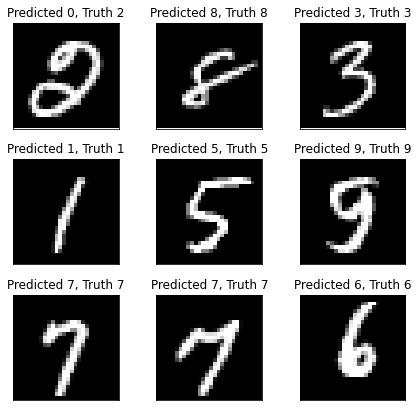

In [27]:
fig = plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Truth {}".format(pred[i],y[i]))
  plt.xticks([])
  plt.yticks([])

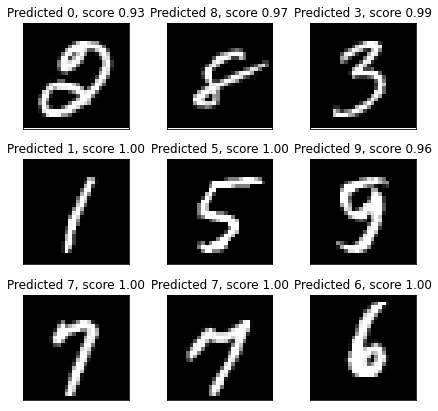

In [28]:
fig = plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, score {:.2f}".format(pred[i],score[i]))
  plt.xticks([])
  plt.yticks([])

### 作用举例
- 电梯按键识别

In [29]:
import torch
import cv2
import numpy as np
# import matplotlib.colors as mat_color
from matplotlib import pyplot as plt

- 读入图片

(1706, 1279, 3)


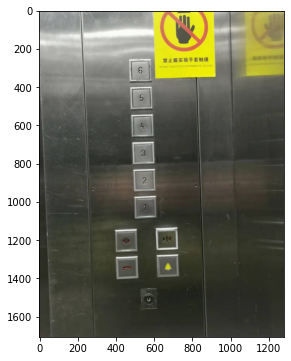

In [32]:
path = r"./images/loft.jpg"
img_bgr = cv2.imread(path)
print(np.shape(img_bgr))

# img_bgr = img_bgr.astype(np.float32)/255
plt.figure(figsize=(6,6))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

- 使用opencv内置函数提取轮廓

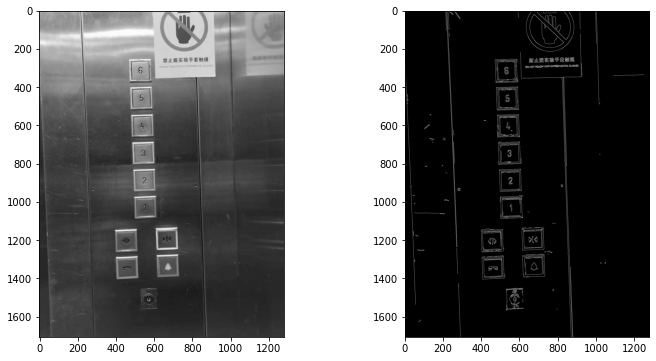

In [33]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
img_h, img_w = img_gray.shape

plt.subplot(1,2,2)

img_canny = cv2.Canny(img_gray, threshold1=70, threshold2=140,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_canny,'gray')

# 获得模型输入
img_tensor = torch.from_numpy(img_gray.reshape((1,1,img_h,img_w)))

- 使用卷积方法提取轮廓
- torch 中处理数据需要归一化 （0-255 变为 0-1）

In [34]:
## 边缘提取
kersize = 7
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[3,3] = 48.0
ker = ker.reshape((1,1,kersize,kersize))
cov2d = torch.nn.Conv2d(1,1,(kersize,kersize),bias=False)
cov2d.weight.data[0] = ker
cov_out = cov2d(img_tensor/255)
cov_out = cov_out.data.squeeze()

(-0.5, 1272.5, 1699.5, -0.5)

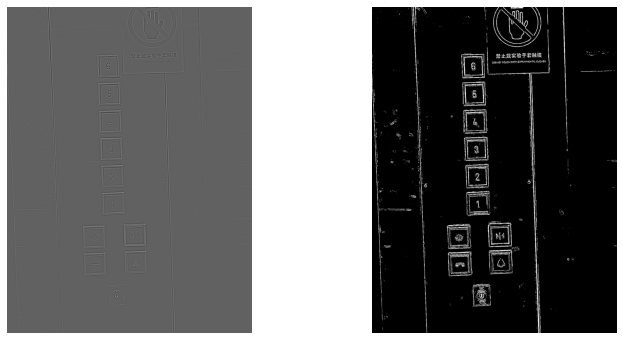

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cov_out,cmap='gray')
plt.axis('off')

_, img_edge = cv2.threshold(cov_out.byte().numpy(), 200,255,cv2.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(img_edge,cmap='gray')
plt.axis('off')

- 提取轮廓点

number of contours: 1885


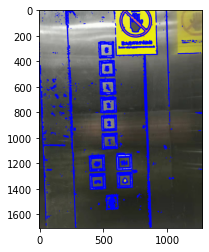

In [36]:
contours, hierarchy = cv2.findContours(img_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
print("number of contours: " + str(len(contours)))
img_rgb_copy = np.copy(img_rgb)
img_con = cv2.drawContours(img_rgb_copy, contours, -1, (0,0,255), 5)
plt.imshow(img_con)

In [37]:
img_rgb_copy = np.copy(img_rgb)
i = 0
for obj in contours:
    area = cv2.contourArea(obj)  #计算轮廓内区域的面积
#     cv2.drawContours(img_rgb_copy, obj, -1, (255, 0, 0), 4)  #绘制轮廓线
    perimeter = cv2.arcLength(obj,True)  #计算轮廓周长
    approx = cv2.approxPolyDP(obj,0.02*perimeter,True)  #获取轮廓角点坐标
    CornerNum = len(approx)   #轮廓角点的数量
    x, y, w, h = cv2.boundingRect(approx)  #获取坐标值和宽度、高度

    #轮廓对象分类
    if CornerNum ==3: objType ="triangle"
    elif CornerNum == 4:
        if area >= 1000:
            i += 1
            if i >=5:
                print(area)
                break

cv2.rectangle(img_rgb_copy,(x,y),(x+w,y+h),(0,255,0),2)  #绘制边界框
cv2.putText(img_rgb_copy,objType,(x+(w//2),y+(h//2)),cv2.FONT_HERSHEY_COMPLEX,0.6,(0,0,0),1)  #绘制文字
print('end')

9284.5
end


In [38]:
x, y, w, h

(487, 551, 101, 102)

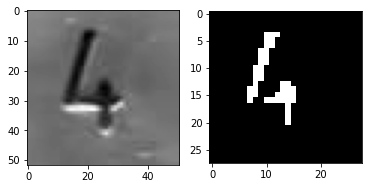

In [39]:
plt.subplot(1,2,1)
num = img_gray[y+30:y+h-20,x+30:x+w-20] # img_bin
plt.imshow(num,'gray')

plt.subplot(1,2,2)
num = cv2.resize(num, (28, 28))
_, img_bin = cv2.threshold(num/255, 0.3,1,cv2.THRESH_BINARY_INV)
plt.imshow(img_bin,'gray')

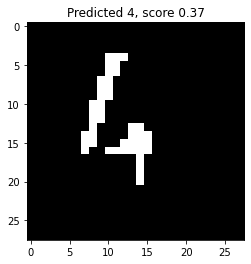

In [40]:
net_load = torch.load("result/class_5/mlp.pkl")
net_load.eval()

sample = torch.tensor(img_bin,dtype = torch.float).reshape(-1,28,28)

y_hat = net_load(sample)
score,pred = torch.max(torch.softmax(y_hat[:10],dim = 1), 1)

plt.title("Predicted {}, score {:.2f}".format(pred.item(),score.item()))
plt.imshow(img_bin,'gray')

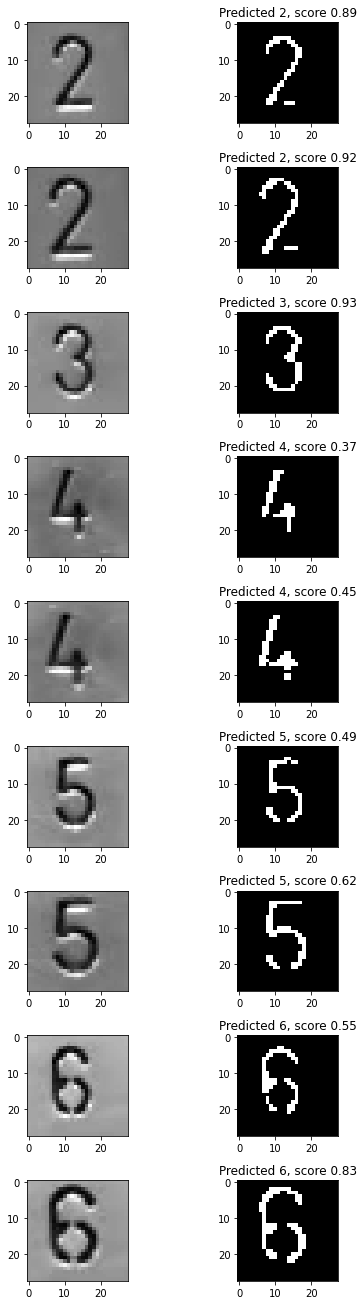

In [41]:
fig = plt.figure(figsize=(6,18))
for k in range(9):
    img_rgb_copy = np.copy(img_rgb)
    i = 0
    for obj in contours:
        area = cv2.contourArea(obj)  #计算轮廓内区域的面积
    #     cv2.drawContours(img_rgb_copy, obj, -1, (255, 0, 0), 4)  #绘制轮廓线
        perimeter = cv2.arcLength(obj,True)  #计算轮廓周长
        approx = cv2.approxPolyDP(obj,0.02*perimeter,True)  #获取轮廓角点坐标
        CornerNum = len(approx)   #轮廓角点的数量
        x, y, w, h = cv2.boundingRect(approx)  #获取坐标值和宽度、高度

        #轮廓对象分类
        if CornerNum ==3: objType ="triangle"
        elif CornerNum == 4:

            if area >= 1000:
                i += 1
                if i >=k+2:
                    break

    cv2.rectangle(img_rgb_copy,(x,y),(x+w,y+h),(0,255,0),2)  #绘制边界框
    cv2.putText(img_rgb_copy,objType,(x+(w//2),y+(h//2)),cv2.FONT_HERSHEY_COMPLEX,0.6,(0,0,0),1)  #绘制文字

    num = img_gray[y+30:y+h-20,x+30:x+w-20] # img_bin
    num = cv2.resize(num, (28, 28))
    _, img_bin = cv2.threshold(num/255, 0.3,1,cv2.THRESH_BINARY_INV)
    sample = torch.tensor(img_bin,dtype = torch.float).reshape(-1,28,28)
    y_hat = net_load(sample)
    score,pred = torch.max(torch.softmax(y_hat[:10],dim = 1), 1)
    
    plt.tight_layout()
    plt.subplot(9,2,k*2+1)
    plt.imshow(num,'gray')

    plt.subplot(9,2,k*2+2)
    plt.imshow(img_bin,'gray')
    plt.title("Predicted {}, score {:.2f}".format(pred.item(),score.item()))

<div align=center>
    <img src="images/图像识别/幻灯片25.JPG" alt="幻灯片" style="zoom:120%;" />